<a href="https://colab.research.google.com/github/JAYANTHNITW/MultiTask_NLP_Project/blob/main/MultichannelCNNArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Embedding,Dropout,LSTM,GRU,Flatten,Conv1D,Input,GlobalMaxPool1D,Concatenate

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train = pd.read_csv("Dataset-Multitask1.csv")
df_train.tail()

,Unnamed: 0,Text,Sarcasm,Stress
7284,1150,"@AngelLamuno @lunarossa Relax mate, we have a ...",0,0
7285,1151,"This doesn't mean that you relax on COVID 19, ...",0,0
7286,1152,Melbourne to relax third lockdown as no new CO...,0,0
7287,1153,JUST IN: Mayors vote 9-8 to put Metro Manila u...,0,0
7288,1154,"You can return to your social apps and news, b...",1,0


In [5]:
df1 = pd.read_csv("Dataset-Multitask1.csv")
df1.shape

(7289, 4)

In [6]:
df2 = pd.read_csv("Dataset-Multitask2.csv")
df2.shape

(16532, 4)

In [7]:
df3 = pd.read_csv("Dataset-Multitask3.csv")
df3.shape

(4062, 4)

In [8]:
df4 = pd.read_csv("Dataset-Multitask4.csv")
df4.shape

(7209, 4)

In [9]:
# df_test = pd.read_csv("Dataset-Multitask1.csv")
# df_test.tail()

In [10]:
df_train = df_train.drop(['Unnamed: 0'],axis=1)
# df_test = df_test.drop(['Unnamed: 0'],axis=1)

In [11]:
#df_train = pd.concat([df_train,df_test],axis=0)

In [12]:
df_train.shape

(7289, 3)

# TEXT Preprocessing

## 1. Lower Casing

In [13]:
df_train['Text'] = df_train['Text'].str.lower()

## 2. HTML Tags

In [14]:
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [15]:
df_train['Text'] = df_train['Text'].apply(remove_html_tags)

## Removing URL's in Text

In [16]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\/S+')
  return pattern.sub(r'',text)

In [17]:
df_train['Text'] = df_train['Text'].apply(remove_url)

## Removing Punctuations

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
exclude = string.punctuation

In [20]:
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [21]:
df_train['Text'] = df_train['Text'].apply(remove_punc)

## 5. Spelling Corrections

In [22]:
from textblob import TextBlob

In [23]:
def correct_spelling(text):
  blob = TextBlob(text)
  corrected_text = blob.correct()
  return str(corrected_text)

## 6. Stemming

In [24]:
from nltk import PorterStemmer

In [25]:
stemmer = PorterStemmer()

In [26]:
df_train['Text'] = df_train['Text'].apply(lambda x:stemmer.stem(x))

## 7. Removing Stopwords

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

df_train['Text'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

,Text
0,peerreviewed article systematically deconstruc...
1,dealing stress children youth living diabetes ...
2,pandemic living stressful everyone even who’ve...
3,stress leave tears insomnia greater victoria t...
4,stress leave tears insomnia greater victoria t...
...,...
7284,angellamuno lunarossa relax mate real covid19 ...
7285,doesnt mean relax covid 19 still us wearamask
7286,melbourne relax third lockdown new covid19 cas...
7287,mayors vote 98 put metro manila mgcq gcq march...


## 8. Tokenization

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
import nltk
from nltk import word_tokenize

In [32]:
df_train['Text'].apply(lambda x:word_tokenize(x))

,Text
0,"[peerreviewed, article, that, systematically, ..."
1,"[dealing, with, stress, for, children, and, yo..."
2,"[pandemic, living, is, stressful, for, everyon..."
3,"[stress, leave, tears, and, insomnia, greater,..."
4,"[stress, leave, tears, and, insomnia, greater,..."
...,...
7284,"[angellamuno, lunarossa, relax, mate, we, have..."
7285,"[this, doesnt, mean, that, you, relax, on, cov..."
7286,"[melbourne, to, relax, third, lockdown, as, no..."
7287,"[just, in, mayors, vote, 98, to, put, metro, m..."


In [33]:
df_train['Text'] = df_train['Text'].apply(lambda x:word_tokenize(x))

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Text'])

In [35]:
x = tokenizer.texts_to_sequences(df_train['Text'])

In [36]:
x

[[1840, 310, 22, 1841, 1842, 1843, 34, 7, 328, 1793, 1844, 534],
 [147,
  12,
  4,
  9,
  162,
  6,
  522,
  329,
  12,
  906,
  24,
  1,
  16,
  177,
  1845,
  862,
  48,
  353],
 [16,
  329,
  11,
  363,
  9,
  330,
  145,
  9,
  158,
  84,
  17,
  566,
  1846,
  408,
  737,
  4,
  6,
  192],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [4, 354, 386, 6, 447, 435, 448, 59, 123, 1, 373, 5, 2],
 [1, 473, 16, 40, 2, 19, 298, 7, 33, 18, 169, 18, 907],
 [2,
  19,
  1847,
  1,
  1224,
  908,
  128,
  57,
  178,
  156,
  938,
  47,
  4,
  57,
  35,
  9,
  318,
  1848,
  8,
  213],
 [1849,
  1850,
  284,
  1,
  30,
  355,
  189,
  118,
  234,
  304,
  1851,
  3,
  14,
  1547,
  1852,
  38,
  145,
  7,
  128,
  1853],
 [110,
  14,
  939,
  12,
  35,
  387,


In [37]:
df_train['Text'].shape

(7289,)

In [38]:
# Vocabulary based on tokenization
vocabulary = tokenizer.word_index
print(len(vocabulary))

5082


In [39]:
import gensim

In [40]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2024-12-17 13:48:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-17 13:48:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-17 13:48:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [41]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [42]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [43]:
glove_input_file = "glove.6B.100d.txt"

In [44]:
glove_output_file = "word2vec.txt"

In [45]:
glove2word2vec(glove_input_file,glove_output_file)

<ipython-input-45-13f14740c424>:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,glove_output_file)


(400000, 100)

In [46]:
maxlen = 25
from keras.utils import pad_sequences
lines_paded = pad_sequences(x,maxlen=25,padding='post')

In [47]:
lines_paded

array([[1840,  310,   22, ...,    0,    0,    0],
       [ 147,   12,    4, ...,    0,    0,    0],
       [  16,  329,   11, ...,    0,    0,    0],
       ...,
       [1543,    3,   21, ...,    0,    0,    0],
       [ 159,    8, 4210, ...,    0,    0,    0],
       [  14,   29,  458, ...,    0,    0,    0]], dtype=int32)

In [48]:
y1 = np.array(df_train['Sarcasm'])
y2 = np.array(df_train['Stress'])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_task1, y_val_task1, y_train_task2, y_val_task2 = train_test_split(
    lines_paded, y1, y2, test_size=0.2, random_state=42)

In [50]:
print(f"x_train shape {X_train.shape}")
print(f"x_val shape {X_val.shape}")
print(f"y_train_task1 shape {y_train_task1.shape}")
print(f"y_train_task2 shape {y_train_task2.shape}")
print(f"y_val_task1 shape {y_val_task1.shape}")
print(f"y_val_task2 shape {y_val_task2.shape}")

x_train shape (5831, 25)
x_val shape (1458, 25)
y_train_task1 shape (5831,)
y_train_task2 shape (5831,)
y_val_task1 shape (1458,)
y_val_task2 shape (1458,)


In [51]:
X_train

array([[   2,   11,  182, ...,    0,    0,    0],
       [  33,   18,    8, ...,    0,    0,    0],
       [ 313,   20,   73, ...,    0,    0,    0],
       ...,
       [ 227,    7,   47, ...,    0,    0,    0],
       [   2,   97,   10, ...,    0,    0,    0],
       [ 189, 4171,   13, ...,    0,    0,    0]], dtype=int32)

In [52]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)

vocab_size = len(vocabulary) + 1  # Add 1 for unknown words

embedding_dim = 100  # Adjust the embedding dimension based on your GloVe model
max_length = 25
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in vocabulary.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [53]:
np.zeros((vocab_size, embedding_dim))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
vocabulary

{'the': 1,
 'covid19': 2,
 'to': 3,
 'stress': 4,
 'of': 5,
 'and': 6,
 'a': 7,
 'in': 8,
 'for': 9,
 'are': 10,
 'is': 11,
 'with': 12,
 'on': 13,
 'you': 14,
 'as': 15,
 'pandemic': 16,
 '’': 17,
 'health': 18,
 'has': 19,
 'it': 20,
 'relax': 21,
 'that': 22,
 'at': 23,
 'during': 24,
 'this': 25,
 'have': 26,
 'we': 27,
 'be': 28,
 'can': 29,
 'people': 30,
 'i': 31,
 '“': 32,
 'mental': 33,
 'from': 34,
 'anxiety': 35,
 'by': 36,
 'but': 37,
 'not': 38,
 'our': 39,
 'how': 40,
 'more': 41,
 'us': 42,
 'covid': 43,
 'their': 44,
 'been': 45,
 'your': 46,
 'new': 47,
 'about': 48,
 's': 49,
 'many': 50,
 'against': 51,
 'if': 52,
 'an': 53,
 'some': 54,
 'help': 55,
 'vaccine': 56,
 'amp': 57,
 'due': 58,
 'teachers': 59,
 '”': 60,
 'need': 61,
 'time': 62,
 'take': 63,
 'up': 64,
 'kids': 65,
 'were': 66,
 'my': 67,
 'all': 68,
 'public': 69,
 'or': 70,
 'year': 71,
 'will': 72,
 'what': 73,
 '19': 74,
 'via': 75,
 'one': 76,
 'than': 77,
 'doctors': 78,
 'seems': 79,
 'rising': 80

In [55]:
embedding_matrix.shape

(5083, 100)

## Multitask CNN architecutre

In [56]:
from sklearn.metrics import f1_score,precision_score

In [57]:
from keras.optimizers import Adam
sequence_len= 25
embedding_dim= 100
input_shape = (sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=False)(input_layer)


In [58]:
input_shape


(25,)

In [59]:
Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=False)

<Embedding name=embedding_1, built=True>

In [67]:
# channel 1
dropout_1 = Dropout(0.5)(embedding_layer)
conv_1d_1 = Conv1D(64,5,activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(conv_1d_1)
gmp1d_1 = GlobalMaxPool1D()(dropout_2)
dense_control_1 = Dense(64,activation='relu')(gmp1d_1)

#  Channel
dropout_3 = Dropout(0.5)(embedding_layer)
conv_1d_2 = Conv1D(64,5,activation='relu')(dropout_3)
dropout_4 = Dropout(0.3)(conv_1d_2)
gmp1d_2 = GlobalMaxPool1D()(dropout_4)

# # For Task3
# dropout_5 = Dropout(0.5)(embedding_layer)
# conv_1d_3 = Conv1D(64,activation='relu')(dropout_5)
# dropout_6 = Dropout(0.3)(conv_1d_3)
# gmp1d_3 = GlobalMaxPool1D()(dropout_6)

merged = Concatenate(axis=-1)([gmp1d_1,gmp1d_2])

dense1 = Dense(64,activation='relu')(merged)
output_sarcasm = Dense(1,activation='sigmoid',name='output_sarcasm')(dense1)
output_stress = Dense(1,activation='sigmoid',name='output_stress')(dense1)

model = Model(inputs=input_layer,outputs=[output_sarcasm,output_stress])
high_learning_rate = 0.1

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=high_learning_rate),metrics=['accuracy','accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 25)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 25, 100)        │        508,300 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 25, 100)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 25, 100)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 21, 64)         │         32,064 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 21, 64)         │         32,064 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 21, 64)         │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 21, 64)         │              0 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 64)             │              0 │ dropout_5[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 64)             │              0 │ dropout_7[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_sarcasm (Dense)    │ (None, 1)              │             65 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_stress (Dense)     │ (None, 1)              │             65 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 580,814 (2.22 MB)

 Trainable params: 72,514 (283.26 KB)

 Non-trainable params: 508,300 (1.94 MB)

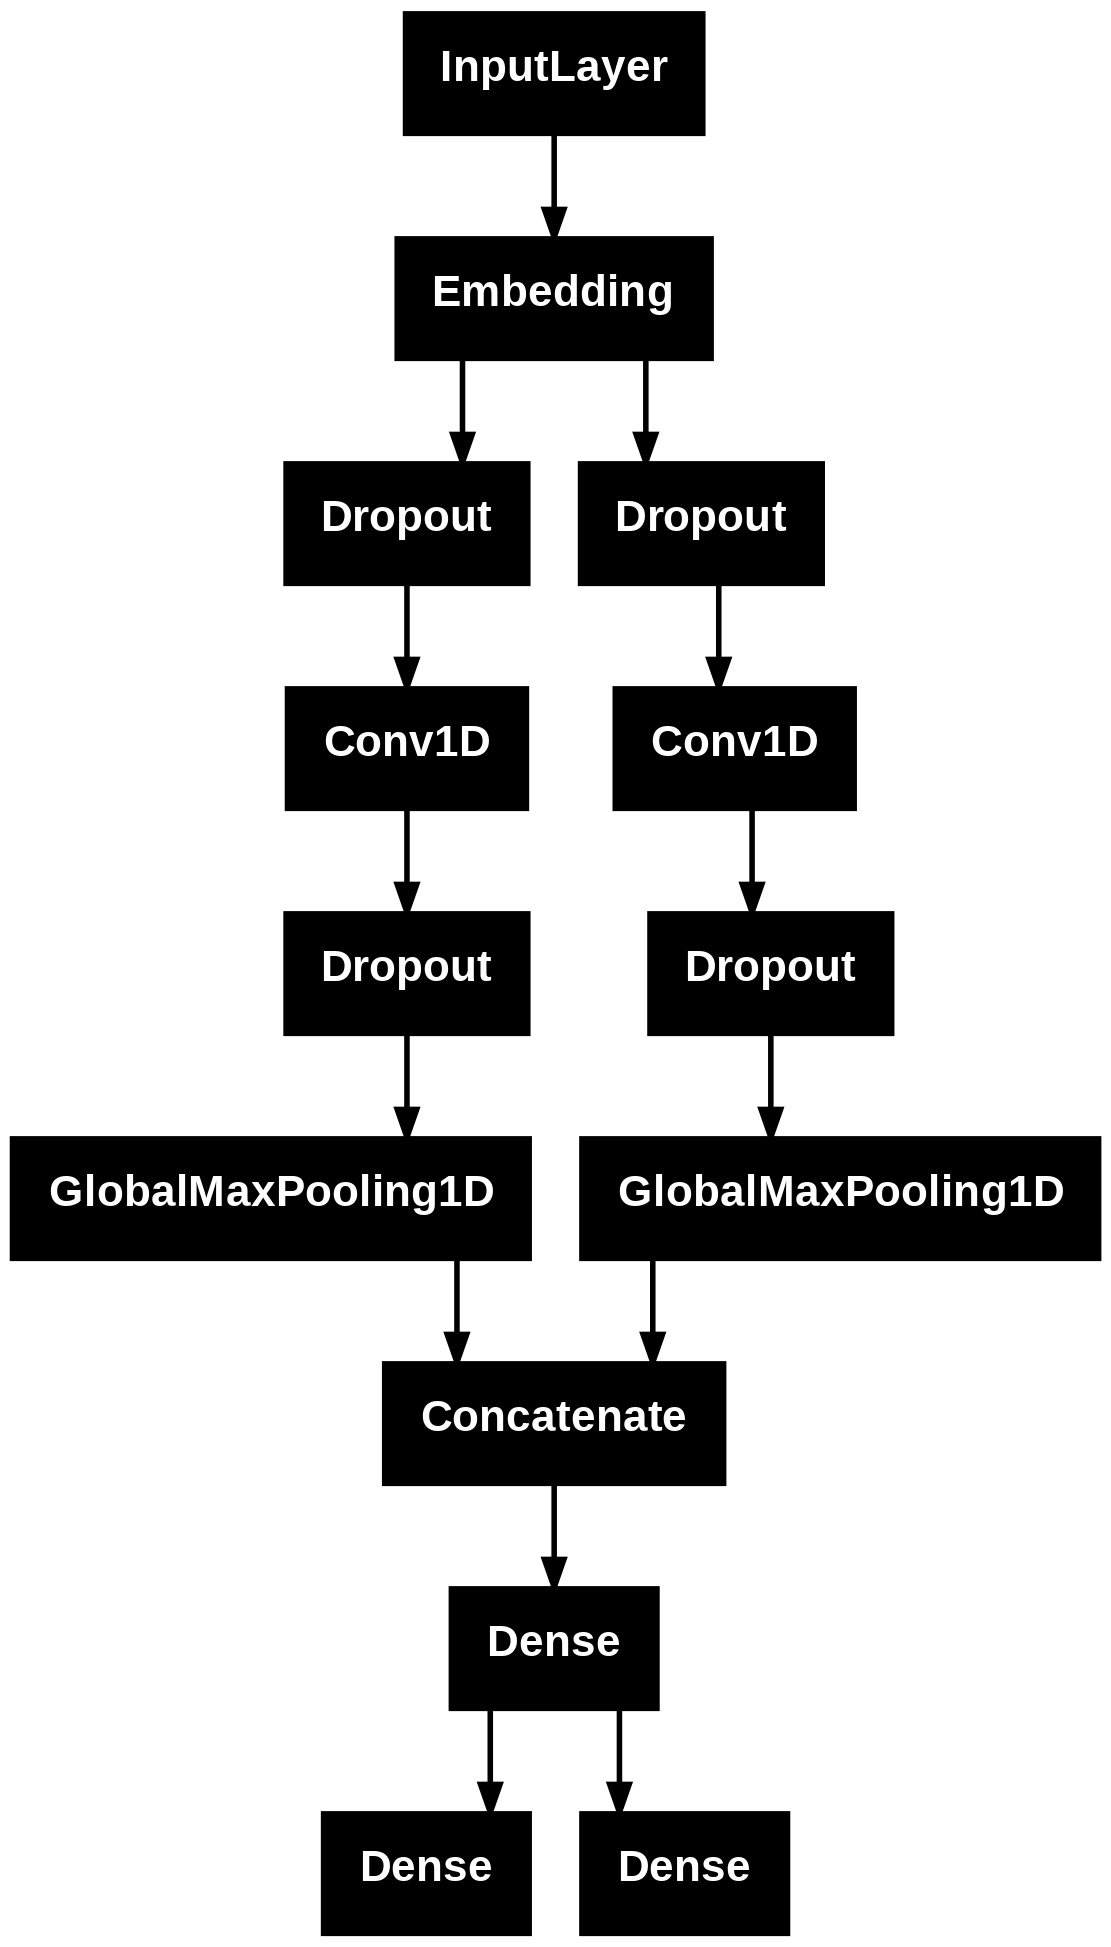

In [68]:
from keras.utils import plot_model
plot_model(model)

In [69]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [70]:
# Create a function to build a TensorBoard callback
# def create_tensorborad_callback():
#   # Create a log directory for storing TensorBoard logs
#   logdir = os.path.join('/content/drive/MyDrive/logs',
#                         # Make it so the logs get tracked whenever we run an experiment
#                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   return tf.keras.callbacks.TensorBoard(logdir)

In [71]:
import os,datetime
import tensorflow as tf

In [65]:
# tensorboard = create_tensorborad_callback(),callbacks=[tensorboard]

In [72]:
history = model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - loss: 6.7581 - output_sarcasm_accuracy: 0.8912 - output_sarcasm_loss: 2.0494 - output_stress_accuracy: 0.7954 - output_stress_loss: 4.7086 - val_loss: 0.5991 - val_output_sarcasm_accuracy: 0.9472 - val_output_sarcasm_loss: 0.2028 - val_output_stress_accuracy: 0.8464 - val_output_stress_loss: 0.3948
Epoch 2/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6433 - output_sarcasm_accuracy: 0.9407 - output_sarcasm_loss: 0.2350 - output_stress_accuracy: 0.8385 - output_stress_loss: 0.4083 - val_loss: 0.5626 - val_output_sarcasm_accuracy: 0.9472 - val_output_sarcasm_loss: 0.2047 - val_output_stress_accuracy: 0.8450 - val_output_stress_loss: 0.3560
Epoch 3/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6655 - output_sarcasm_accuracy: 0.9377 - output_sarcasm_loss: 0.2349 - output_stress_accuracy: 0.8426 - output_stress_loss: 0.4307 - val_loss: 0.6215 - val_output_sarcasm_accuracy: 0.9472 - val_output_sarcasm_loss: 0.2021 - val_

In [73]:
#model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

In [74]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [75]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
# print(y_pred_binary1)

In [81]:
(y_val_task1[:100],y_pred_binary1[:100])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

In [76]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.0


In [77]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress )

0.9159851301115242


In [79]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.8449931412894376


## GRU CNN GRU WITH ATTENTION LAYERS

In [84]:
from keras.src.layers import Concatenate
from keras.layers import Bidirectional,GlobalMaxPool1D,Attention,RepeatVector
from keras.optimizers import Adam
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)
# Conv layer + Maxpool layer *3
conv_layer=Conv1D(64,5,activation='relu',)(embedding_layer)
conv_layer = GlobalMaxPool1D()(conv_layer)

# Lstm for task1
lstm_layer1 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer1 = Attention()([lstm_layer1, lstm_layer1])
attended_lstm1 = Concatenate(axis=-1)([lstm_layer1, attention_layer1])
lstm_layer1 = GlobalMaxPool1D()(attended_lstm1)

# Lstm for task2
lstm_layer2 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer2 = Attention()([lstm_layer2, lstm_layer2])
attended_lstm2 = Concatenate(axis=-1)([lstm_layer2, attention_layer2])
lstm_layer2 = GlobalMaxPool1D()(attended_lstm2)
#Reshaping
conv_layer_reshaped = RepeatVector(sequence_len)(conv_layer)
lstm_layer_reshaped1 = RepeatVector(sequence_len)(lstm_layer1)
lstm_layer_reshaped2 = RepeatVector(sequence_len)(lstm_layer2)
# concatenation
concatenated1 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped1])
concatenated2 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped2])
# Flatten the concatenated output to match the shape for binary classification
flattened_output1 = Flatten()(concatenated1)
flattened_output2 = Flatten()(concatenated2)

output1 = Dense(1,activation='sigmoid',name='sarcasm')(flattened_output1)
output2 = Dense(1,activation='sigmoid',name='stress')(flattened_output2)

model = Model(inputs=input_layer, outputs=[output1,output2])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy','accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 25, 100)        │        508,300 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 25, 128)        │         63,744 │ embedding_3[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 25, 128)        │         63,744 │ embedding_3[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 25, 128)        │              0 │ bidirectional_2[0][0], │
│                           │                        │                │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_3 (Attention)   │ (None, 25, 128)        │              0 │ bidirectional_3[0][0], │
│                           │                        │                │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 21, 64)         │         32,064 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 25, 256)        │              0 │ bidirectional_2[0][0], │
│ (Concatenate)             │                        │                │ attention_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 25, 256)        │              0 │ bidirectional_3[0][0], │
│ (Concatenate)             │                        │                │ attention_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_7    │ (None, 64)             │              0 │ conv1d_5[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_8    │ (None, 256)            │              0 │ concatenate_6[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_9    │ (None, 256)            │              0 │ concatenate_7[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_3           │ (None, 25, 64)         │              0 │ global_max_pooling1d_… │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_4           │ (None, 25, 256)        │              0 │ global_max_pooling1d_… │
│ (RepeatVector)       

 Total params: 683,854 (2.61 MB)

 Trainable params: 175,554 (685.76 KB)

 Non-trainable params: 508,300 (1.94 MB)

In [85]:
model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 51.6220 - sarcasm_accuracy: 0.8802 - sarcasm_loss: 15.5883 - stress_accuracy: 0.7912 - stress_loss: 36.0326 - val_loss: 57.1578 - val_sarcasm_accuracy: 0.2497 - val_sarcasm_loss: 47.3254 - val_stress_accuracy: 0.8272 - val_stress_loss: 9.7312
Epoch 2/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 19.4807 - sarcasm_accuracy: 0.8854 - sarcasm_loss: 12.5583 - stress_accuracy: 0.9058 - stress_loss: 6.9355 - val_loss: 41.8255 - val_sarcasm_accuracy: 0.3717 - val_sarcasm_loss: 24.0430 - val_stress_accuracy: 0.7112 - val_stress_loss: 17.4970
Epoch 3/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 31.5771 - sarcasm_accuracy: 0.8762 - sarcasm_loss: 21.9425 - stress_accuracy: 0.9129 - stress_loss: 9.6332 - val_loss: 38.1798 - val_sarcasm_accuracy: 0.9335 - val_sarcasm_loss: 23.5554 - val_stress_accuracy: 0.9232 - val_stress_loss: 14.8546
Epoch 4/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 27.6313 - sarcasm_accurac

In [86]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [87]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
print(y_pred_binary1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [88]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.0


In [89]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress )

0.951440329218107


In [91]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.9649415692821369


In [92]:
from keras.src.layers import Concatenate
from keras.optimizers import Adam
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)

BiGRU_layer = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer = Attention()([BiGRU_layer,BiGRU_layer])
concatenated_layer = Concatenate(axis=-1)([attention_layer,BiGRU_layer])
gmp_layer = GlobalMaxPool1D()(concatenated_layer)

dense_layer1 = Dense(64,activation='relu')(gmp_layer)
dense_layer2 = Dense(64,activation='relu')(gmp_layer)

output_sarcasm = Dense(1,activation='sigmoid',name='sarcasm')(dense_layer1)
concatenated_for_stress = Concatenate(axis=-1)([dense_layer2,output_sarcasm])
output_stress = Dense(1,activation='sigmoid',name='stress')(concatenated_for_stress)

model = Model(inputs=input_layer,outputs=[output_sarcasm,output_stress])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 25, 100)        │        508,300 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_4           │ (None, 25, 128)        │         63,744 │ embedding_4[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_4 (Attention)   │ (None, 25, 128)        │              0 │ bidirectional_4[0][0], │
│                           │                        │                │ bidirectional_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 25, 256)        │              0 │ attention_4[0][0],     │
│ (Concatenate)             │                        │                │ bidirectional_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_10   │ (None, 256)            │              0 │ concatenate_10[0][0]   │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │         16,448 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sarcasm (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │         16,448 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_11            │ (None, 65)             │              0 │ dense_5[0][0],         │
│ (Concatenate)             │                        │                │ sarcasm[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stress (Dense)            │ (None, 1)              │             66 │ concatenate_11[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 605,071 (2.31 MB)

 Trainable params: 96,771 (378.01 KB)

 Non-trainable params: 508,300 (1.94 MB)

In [93]:
model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15


ValueError: For a model with multiple outputs, when providing the `metrics` argument as a list, it should have as many entries as the model has outputs. Received:
metrics=['accuracy']
of length 1 whereas the model has 2 outputs.

In [ ]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

In [ ]:
print(y_pred_task1.max())

In [ ]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
print(y_pred_binary1)

In [ ]:
y_val_task1[:100]

In [ ]:
y_pred_binary1[:10]

In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress )

In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

In [ ]:
# !tensorboard dev upload \
# --logdir "/content/drive/MyDrive/logs" \
# --name "Sarcasm and Stress Multichannel CNN with 4 datasets" \
# --one_shot

In [ ]:
from keras.optimizers import Adam
from keras.layers import Bidirectional
inp = Input(shape=(25,))
x = Embedding(vocab_size, 100, weights=[embedding_matrix],trainable=False)(inp)
x = LSTM(1, return_sequences=True)(x)#return_sequences=True
x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train_task1,validation_data=(X_val,y_val_task1),epochs=15,batch_size=32)

In [ ]:
y_pred_task1 = model.predict(X_val)

In [ ]:
import numpy as np

threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = np.where(y_pred_task1 >= threshold, 1, 0)
print(y_pred_binary[:10])

In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary)
print(f1_score_Sarcasm)

In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

In [ ]:
model.fit(X_train,y_train_task2,validation_data=(X_val,y_val_task2),epochs=15,batch_size=32)

In [ ]:
y_pred_task2 = model.predict(X_val)

In [ ]:
y_pred_binary2 = np.where(y_pred_task2 >= threshold, 1, 0)
print(y_pred_binary2[:10])

In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress)

In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)